In [3]:
import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import PIL
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import gzip
import numpy as np
import time



## QUESTION 1

100%|██████████| 9912422/9912422 [00:00<00:00, 126529932.21it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 34462501.80it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 39832347.86it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19518984.39it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Total time to load in batches (batch size 64): 0.3250 seconds using custom code
Total time to load in batches (batch size 128): 0.3164 seconds using custom code
Total time to load in batches (batch size 256): 0.3253 seconds using custom code
Total time to load in batches (batch size 1024): 0.3039 seconds using custom code
Total time to load in batches (batch size 64): 11.7453 seconds using PyTorch
Total time to load in batches (batch size 128): 11.5242 seconds using PyTorch
Total time to load in batches (batch size 256): 11.3960 seconds using PyTorch
Total time to load in batches (batch size 1024): 11.5412 seconds using PyTorch


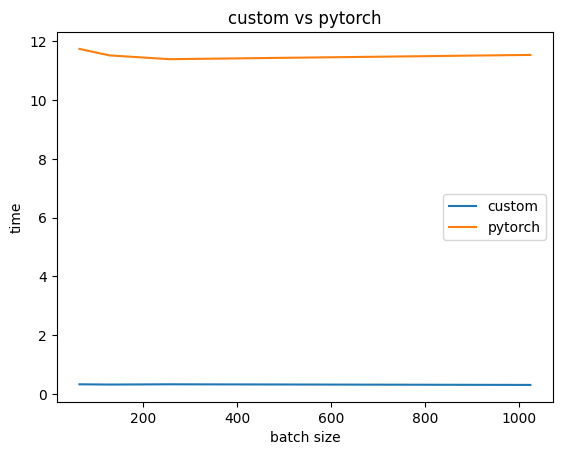

In [5]:
import numpy as np
import gzip
import time
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST


train_dataset = MNIST('./data', train=True, transform=True, download=True)
test_dataset = MNIST('./data', train=False, transform=True, download=True)


custom_train = []
custom_test = []
pytorch_train = []
pytorch_test = []
def load_mnist_images(filename, num_images):
    with gzip.open(filename, 'rb') as f:
        # Read magic number and dimensions
        magic_number = int.from_bytes(f.read(4), 'big')
        num_images = int.from_bytes(f.read(4), 'big')
        rows = int.from_bytes(f.read(4), 'big')
        cols = int.from_bytes(f.read(4), 'big')

        # Read image data
        image_data = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows, cols)
        # Normalize pixel values to the range [0, 1]
        image_data = image_data / 255.0

    return image_data

def load_mnist_labels(filename, num_labels):
    with gzip.open(filename, 'rb') as f:
        # Read magic number and number of labels
        magic_number = int.from_bytes(f.read(4), 'big')
        num_labels = int.from_bytes(f.read(4), 'big')

        # Read label data
        label_data = np.frombuffer(f.read(), dtype=np.uint8)

    return label_data

def load_mnist_batch(images_filename, labels_filename, batch_size):
    with gzip.open(images_filename, 'rb') as f_images, gzip.open(labels_filename, 'rb') as f_labels:
        # Read image metadata
        magic_number_images = int.from_bytes(f_images.read(4), 'big')
        num_images = int.from_bytes(f_images.read(4), 'big')
        rows = int.from_bytes(f_images.read(4), 'big')
        cols = int.from_bytes(f_images.read(4), 'big')

        # Read label metadata
        magic_number_labels = int.from_bytes(f_labels.read(4), 'big')
        num_labels = int.from_bytes(f_labels.read(4), 'big')

        # Check if the number of images and labels match
        assert num_images == num_labels, "Number of images and labels do not match."

        # Determine the number of batches
        num_batches = num_images // batch_size
        for batch in range(num_batches):
            # Read image batch

            image_data = np.frombuffer(f_images.read(batch_size * rows * cols), dtype=np.uint8).reshape(batch_size, rows, cols)

            # Normalize pixel values to the range [0, 1]
            image_data = image_data / 255.0

            label_data = np.frombuffer(f_labels.read(batch_size), dtype=np.uint8)

            yield image_data, label_data


# Specify the paths to the MNIST dataset files
train_images_path = 'data/MNIST/raw/train-images-idx3-ubyte.gz'
train_labels_path = 'data/MNIST/raw/train-labels-idx1-ubyte.gz'
test_images_path = 'data/MNIST/raw/t10k-images-idx3-ubyte.gz'
test_labels_path = 'data/MNIST/raw/t10k-labels-idx1-ubyte.gz'


# Specify batch sizes to test
batch_sizes = [64, 128,256,1024]

# Load training data for different batch sizes
for batch_size in batch_sizes:
    # print(f"\nLoading training data for batch size {batch_size}:")
    start = time.time()
    for images, labels in load_mnist_batch(train_images_path, train_labels_path, batch_size):
        pass  # Process the batch here if needed
    for images, labels in load_mnist_batch(test_images_path, test_labels_path, batch_size):
        pass  # Process the batch here if needed
    end = time.time()
    custom_train.append(end - start)
    print(f"Total time to load in batches (batch size {batch_size}): {end - start:.4f} seconds using custom code")


# Load testing data for different batch sizes
# for batch_size in batch_sizes:
#     # print(f"\nLoading testing data for batch size {batch_size}:")
#     for images, labels in load_mnist_batch(test_images_path, test_labels_path, batch_size):
#         pass  # Process the batch here if needed



#### Pytorch
def load_mnist_torch(batch_size, train=True):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    dataset = datasets.MNIST(root='./data', train=train, download=True, transform=transform)
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    return loader

# Specify batch sizes to test
batch_sizes = [64, 128,256,1024]

# Load training data for different batch sizes using PyTorch
for batch_size in batch_sizes:
    start_time = time.time()
    train_loader = load_mnist_torch(batch_size, train=True)
    test_loader = load_mnist_torch(batch_size, train=False)
    for _, _ in train_loader:
        pass  # Process the batch here if needed
    end_time = time.time()
    pytorch_train.append(end_time - start_time)
    print(f"Total time to load in batches (batch size {batch_size}): {end_time - start_time:.4f} seconds using PyTorch")

# Load testing data for different batch sizes using PyTorch
# for batch_size in batch_sizes:
#     start_time = time.time()
#     test_loader = load_mnist_torch(batch_size, train=False)
#     for _, _ in test_loader:
#         pass  # Process the batch here if needed
#     end_time = time.time()
    # print(f"Total time to load testing data: {end_time - start_time:.4f} seconds")
# print(custom_train)
# print(pytorch_train)
# plot custom and pytorch
plt.plot(batch_sizes, custom_train, label='custom')
plt.plot(batch_sizes, pytorch_train, label='pytorch')
plt.xlabel('batch size')
plt.ylabel('time')
plt.title('custom vs pytorch')
plt.legend()
plt.show()


## Question 2

Epoch 1/60 -> Train Loss: 2.3055, Train Accuracy: 0.0988 Validation Loss: 2.3072, Validation Accuracy: 0.0773 Test Loss: 2.3058, Test Accuracy: 0.0958
Epoch 2/60 -> Train Loss: 2.3044, Train Accuracy: 0.0973 Validation Loss: 2.3058, Validation Accuracy: 0.0757 Test Loss: 2.3047, Test Accuracy: 0.0927
Epoch 3/60 -> Train Loss: 2.3034, Train Accuracy: 0.0981 Validation Loss: 2.3045, Validation Accuracy: 0.0839 Test Loss: 2.3037, Test Accuracy: 0.0987
Epoch 4/60 -> Train Loss: 2.3025, Train Accuracy: 0.1038 Validation Loss: 2.3033, Validation Accuracy: 0.1102 Test Loss: 2.3027, Test Accuracy: 0.1023
Epoch 5/60 -> Train Loss: 2.3017, Train Accuracy: 0.1049 Validation Loss: 2.3021, Validation Accuracy: 0.1102 Test Loss: 2.3018, Test Accuracy: 0.1029
Epoch 6/60 -> Train Loss: 2.3009, Train Accuracy: 0.1044 Validation Loss: 2.3010, Validation Accuracy: 0.1102 Test Loss: 2.3009, Test Accuracy: 0.1029
Epoch 7/60 -> Train Loss: 2.3000, Train Accuracy: 0.1044 Validation Loss: 2.2999, Validation A

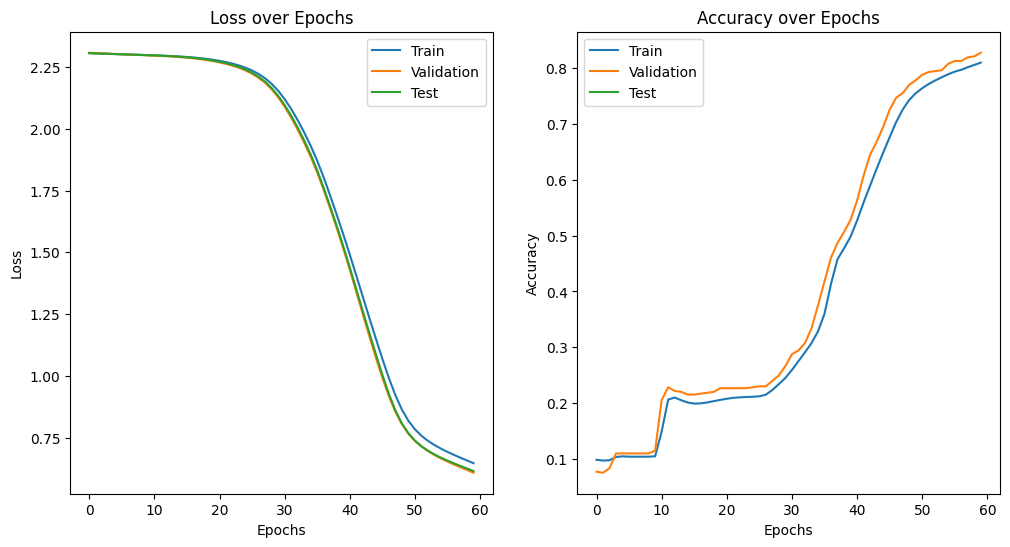

In [ ]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import gzip
import numpy as np
import time

# Define the neural network architecture
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(FeedForwardNN, self).__init__()
        self.layers = nn.ModuleList()
        in_size = input_size
        # print(in_size)
        for hidden_size in hidden_sizes:
            self.layers.append(nn.Linear(in_size, hidden_size))
            self.layers.append(nn.ReLU())
            in_size = hidden_size
        self.layers.append(nn.Linear(in_size, output_size))
        # print(self.layers)
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Function to train the model
def train_model(model, criterion, optimizer,train_images,train_labels):
    model.train()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for inputs, labels in zip(train_images,train_labels):
        inputs = torch.from_numpy(inputs)
        labels = torch.from_numpy(labels)
        inputs, labels = inputs.to(dtype=torch.float32), labels

        optimizer.zero_grad()
        # print(inputs.size())
        outputs = model(inputs.view(inputs.size(0), -1))
        # print(outputs.size(),labels.size())
        loss = criterion(outputs, labels)
        # print(loss.item())
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct_predictions += predicted.eq(labels).sum().item()
        total_samples += labels.size(0)

    total_loss*=batch_size
    average_loss = total_loss / total_samples
    accuracy = correct_predictions / total_samples

    return average_loss, accuracy

# Function to evaluate the model on validation or test set
def evaluate_model(model, criterion, test_images, test_labels):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in zip(test_images,test_labels):
            inputs = torch.from_numpy(inputs)
            labels = torch.from_numpy(labels)
            inputs, labels = inputs.to(dtype=torch.float32), labels

            outputs = model(inputs.view(inputs.size(0), -1))
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct_predictions += predicted.eq(labels).sum().item()
            total_samples += labels.size(0)

    # print(len(labels),total_samples,total_samples/32)
    total_loss*=batch_size
    average_loss = total_loss / total_samples
    accuracy = correct_predictions / total_samples

    return average_loss, accuracy

# Function to plot training progress
def plot_progress(train_losses, val_losses, train_accuracies, val_accuracies,test_losses,test_accuracies):
    plt.figure(figsize=(12, 4))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train')
    plt.plot(val_losses, label='Validation')
    plt.plot(test_losses, label='Test')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train')
    plt.plot(val_accuracies, label='Validation')
    plt.plot(test_accuracies, label='Test')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


# Load MNIST data with the custom DataLoader functions
batch_size = 32
train_transform = transforms.Compose([transforms.ToTensor()])
train_dataset = MNIST('./data', train=True, transform=train_transform, download=True)

# Convert the MNIST data to NumPy arrays using custom functions
train_images = load_mnist_images('data/MNIST/raw/train-images-idx3-ubyte.gz', len(train_dataset))
train_labels = load_mnist_labels('data/MNIST/raw/train-labels-idx1-ubyte.gz', len(train_dataset))
test_images = load_mnist_images('data/MNIST/raw/t10k-images-idx3-ubyte.gz', 10000)
test_labels = load_mnist_labels('data/MNIST/raw/t10k-labels-idx1-ubyte.gz', 10000)
# Create a DataLoader from NumPy arrays
# train_data = TensorDataset(torch.from_numpy(train_images), torch.from_numpy(train_labels))
# train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
# test_data = TensorDataset(torch.from_numpy(test_images), torch.from_numpy(test_labels))
# test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
input_size = 28 * 28  # MNIST image size
hidden_sizes = [32, 32, 32, 32]  # Four hidden layers with 32 neurons each
output_size = 10  # Number of classes (digits 0-9)
model = FeedForwardNN(input_size, hidden_sizes, output_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0003)

# Training loop
num_epochs = 60
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
test_accuracies = []
test_losses = []

for epoch in range(num_epochs):
    # Train the model
    train_images = []
    train_labels = []
    for train_image,train_label in load_mnist_batch(train_images_path, train_labels_path, batch_size):
      train_images.append(train_image)
      train_labels.append(train_label)
    test_images = []
    test_labels = []
    for test_image,test_label in load_mnist_batch(test_images_path, test_labels_path, batch_size):
      test_images.append(test_image)
      test_labels.append(test_label)
    # split the data into train and validation
    train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.01, random_state=42)
    train_loss, train_accuracy = train_model(model, criterion, optimizer, train_images, train_labels)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_loss, val_accuracy = evaluate_model(model, criterion, val_images, val_labels)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    # Test the model
    test_loss, test_accuracy = evaluate_model(model, criterion, test_images, test_labels)
    test_losses.append(test_loss)

    print(f'Epoch {epoch + 1}/{num_epochs} -> Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}',
          f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}',f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Plot training progress
plot_progress(train_losses, val_losses, train_accuracies, val_accuracies, test_losses, test_accuracies)


## QUESTION 2 USING SIGMOID ACTIVATION FUNCTION

In [ ]:
timesCustom = []
def load_mnist_batch(images_filename, labels_filename, batch_size):
    with gzip.open(images_filename, 'rb') as f_images, gzip.open(labels_filename, 'rb') as f_labels:
        # Read image metadata
        magic_number_images = int.from_bytes(f_images.read(4), 'big')
        num_images = int.from_bytes(f_images.read(4), 'big')
        rows = int.from_bytes(f_images.read(4), 'big')
        cols = int.from_bytes(f_images.read(4), 'big')

        # Read label metadata
        magic_number_labels = int.from_bytes(f_labels.read(4), 'big')
        num_labels = int.from_bytes(f_labels.read(4), 'big')

        # Check if the number of images and labels match
        assert num_images == num_labels, "Number of images and labels do not match."

        # Determine the number of batches
        num_batches = num_images // batch_size
        start_time = time.time()
        for batch in range(num_batches):
            # Read image batch
            image_data = np.frombuffer(f_images.read(batch_size * rows * cols), dtype=np.uint8).reshape(batch_size, rows, cols)
            # Normalize
            image_data = image_data / 255.0
            label_data = np.frombuffer(f_labels.read(batch_size), dtype=np.uint8)

            # Convert to PyTorch tensors
            image_data = torch.tensor(image_data, dtype=torch.float32)
            label_data = torch.tensor(label_data, dtype=torch.int64)

            yield image_data, label_data


Epoch [1/60], Training Loss: 2.2077, Training Accuracy: 22.92%
Time to train epoch: 9.9191 seconds
Validation Loss: 2.1082, Validation Accuracy: 38.31%
Epoch [2/60], Training Loss: 2.0587, Training Accuracy: 49.73%
Time to train epoch: 3.6508 seconds
Validation Loss: 2.0081, Validation Accuracy: 60.39%
Epoch [3/60], Training Loss: 1.9764, Training Accuracy: 63.93%
Time to train epoch: 4.2870 seconds
Validation Loss: 1.9374, Validation Accuracy: 68.54%
Epoch [4/60], Training Loss: 1.9125, Training Accuracy: 69.73%
Time to train epoch: 3.7121 seconds
Validation Loss: 1.8786, Validation Accuracy: 72.37%
Epoch [5/60], Training Loss: 1.8577, Training Accuracy: 72.39%
Time to train epoch: 3.6957 seconds
Validation Loss: 1.8263, Validation Accuracy: 74.24%
Epoch [6/60], Training Loss: 1.8081, Training Accuracy: 74.11%
Time to train epoch: 4.4401 seconds
Validation Loss: 1.7782, Validation Accuracy: 76.12%
Epoch [7/60], Training Loss: 1.7618, Training Accuracy: 75.66%
Time to train epoch: 3.70

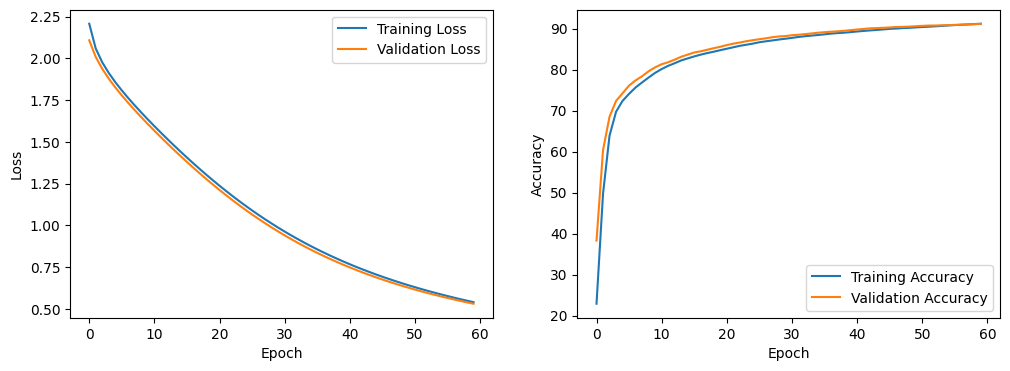

In [ ]:
# FF NN with 5 layers
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        super(SimpleNN, self).__init__()
        self.layers = nn.ModuleList()
        self.bns = nn.ModuleList()
        self.sigmoids = nn.ModuleList()

        for i in range(4):
            if i == 0:
                self.layers.append(nn.Linear(input_size, hidden_size))
            else:
                self.layers.append(nn.Linear(hidden_size, hidden_size))

            self.bns.append(nn.BatchNorm1d(hidden_size))
            self.sigmoids.append(nn.Sigmoid())

        # Output layer
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.output_bn = nn.BatchNorm1d(output_size)

    def forward(self, x):
        for i in range(len(self.layers)):
            x = self.layers[i](x)
            x = self.bns[i](x)
            x = self.sigmoids[i](x)

        # Output layer
        x = self.output_layer(x)
        x = self.output_bn(x)

        return x

network = SimpleNN(28*28, 32, 10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(network.parameters(), lr=0.0003)
# Load the data using custom dataloader
epochs = 60
lossTrainTorch = []
accuracyTrainTorch = []
lossTestTorch = []
accuracyTestTorch = []
batch_size = 32


for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    start_time = time.time()
    for images, labels in load_mnist_batch(train_images_path, train_labels_path, batch_size):
        # Forward, backward, and update parameters
        images = images.view(-1, 28*28)
        images, labels = images.to(device), labels.to(device)
        outputs = network(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    running_loss *= batch_size
    lossTrainTorch.append(running_loss / total)
    accuracyTrainTorch.append(correct / total)
    end_time = time.time()

    print(f'Epoch [{epoch + 1}/{epochs}], '
          f'Training Loss: {running_loss / total:.4f}, Training Accuracy: {100 * correct / total:.2f}%')
    print(f"Time to train epoch: {end_time - start_time:.4f} seconds")

    # Test the model
    with torch.no_grad():
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in load_mnist_batch(test_images_path, test_labels_path, batch_size):
            images, labels = images.to(device), labels.to(device)
            images = images.view(-1, 28*28)
            outputs = network(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        running_loss *= batch_size
        lossTestTorch.append(running_loss / total)
        accuracyTestTorch.append(correct / total)
        print(f'Validation Loss: {running_loss / total:.4f}, Validation Accuracy: {100 * correct / total:.2f}%')
#plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(lossTrainTorch, label='Training Loss')
plt.plot(lossTestTorch, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([100 * i for i in accuracyTrainTorch], label='Training Accuracy')
plt.plot([100 * i for i in accuracyTestTorch], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## QUESTION 3

### BACK PROPAGATION USING RELU

Epoch 1 - Loss: 7.5617, Accuracy: 8.91%
Validation Loss: 7.5617, Accuracy: 8.91%
Epoch 2 - Loss: 3.6492, Accuracy: 11.95%
Validation Loss: 3.6492, Accuracy: 11.95%
Epoch 3 - Loss: 2.9517, Accuracy: 14.34%
Validation Loss: 2.9517, Accuracy: 14.34%
Epoch 4 - Loss: 2.6695, Accuracy: 17.10%
Validation Loss: 2.6695, Accuracy: 17.10%
Epoch 5 - Loss: 2.4425, Accuracy: 19.47%
Validation Loss: 2.4425, Accuracy: 19.47%
Epoch 6 - Loss: 2.3481, Accuracy: 22.29%
Validation Loss: 2.3481, Accuracy: 22.29%
Epoch 7 - Loss: 2.2450, Accuracy: 25.24%
Validation Loss: 2.2450, Accuracy: 25.24%
Epoch 8 - Loss: 2.1771, Accuracy: 28.02%
Validation Loss: 2.1771, Accuracy: 28.02%
Epoch 9 - Loss: 2.1160, Accuracy: 30.05%
Validation Loss: 2.1160, Accuracy: 30.05%
Epoch 10 - Loss: 2.0725, Accuracy: 31.98%
Validation Loss: 2.0725, Accuracy: 31.98%
Epoch 11 - Loss: 2.0326, Accuracy: 33.51%
Validation Loss: 2.0326, Accuracy: 33.51%
Epoch 12 - Loss: 2.0037, Accuracy: 34.82%
Validation Loss: 2.0037, Accuracy: 34.82%
Epo

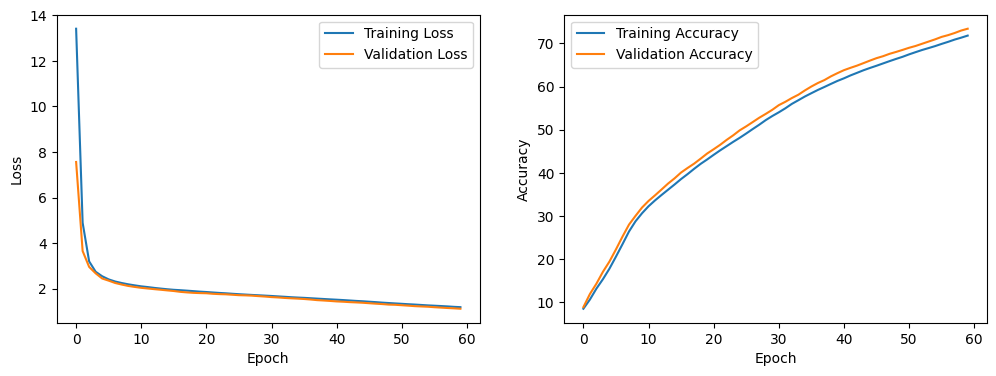

In [ ]:
def cross_entropy_loss(predictions, targets):
    #targets to one hot
    y = torch.zeros_like(predictions)
    y[range(predictions.shape[0]), targets] = 1

    # Clip predictions to avoid numerical instability
    epsilon = 1e-15
    predictions = torch.clamp(predictions, epsilon, 1.0 - epsilon)

    # Calculate cross-entropy loss
    cross_entropy_loss = -torch.sum(y * torch.log(predictions))
    return cross_entropy_loss / predictions.shape[0]


def cross_entropy_loss_backward(outputs, labels):
    y = torch.zeros_like(outputs)
    y[range(outputs.shape[0]), labels] = 1
    return (outputs - y) / outputs.shape[0]

def relu_forward(x):
    return torch.max(torch.zeros_like(x), x)

def relu_backward(x):
    return (x > 0).float()

def sigmoid_forward(x):
    x -= torch.max(x)
    return 1 / (1 + torch.exp(-x))

def sigmoid_backward(x):
    return x * (1 - x)

class NeuralNet:
    def __init__(self):
        #Xavier initialization
        self.w1 = torch.randn(784, 32) * np.sqrt(2 / (784 + 32))
        self.b1 = torch.randn(32) * np.sqrt(2 / (784 + 32))
        self.w2 = torch.randn(32, 32) * np.sqrt(2 / (32 + 32))
        self.b2 = torch.randn(32) * np.sqrt(2 / (32 + 32))
        self.w3 = torch.randn(32, 32) * np.sqrt(2 / (32 + 32))
        self.b3 = torch.randn(32) * np.sqrt(2 / (32 + 32))
        self.w4 = torch.randn(32, 32) * np.sqrt(2 / (32 + 32))
        self.b4 = torch.randn(32) * np.sqrt(2 / (32 + 32))
        self.w5 = torch.randn(32, 10) * np.sqrt(2 / (32 + 10))
        self.b5 = torch.randn(10) * np.sqrt(2 / (32 + 10))


    def forward(self, x):
        self.x1 = x.view(-1, 784)  # flatten the input
        self.y1 = torch.matmul(self.x1, self.w1) + self.b1
        self.x2 = relu_forward(self.y1)
        self.y2 = torch.matmul(self.x2, self.w2) + self.b2
        self.x3 = relu_forward(self.y2)
        self.y3 = torch.matmul(self.x3, self.w3) + self.b3
        self.x4 = relu_forward(self.y3)
        self.y4 = torch.matmul(self.x4, self.w4) + self.b4
        self.x5 = relu_forward(self.y4)
        self.y5 = torch.matmul(self.x5, self.w5) + self.b5
        return self.y5



    def backward(self, y, outputs):
        # Initialize gradients
        weights_gradients = []
        biases_gradients = []
        weights_gradients.append(torch.zeros_like(self.w1))
        weights_gradients.append(torch.zeros_like(self.w2))
        weights_gradients.append(torch.zeros_like(self.w3))
        weights_gradients.append(torch.zeros_like(self.w4))
        weights_gradients.append(torch.zeros_like(self.w5))
        biases_gradients.append(torch.zeros_like(self.b1))
        biases_gradients.append(torch.zeros_like(self.b2))
        biases_gradients.append(torch.zeros_like(self.b3))
        biases_gradients.append(torch.zeros_like(self.b4))
        biases_gradients.append(torch.zeros_like(self.b5))

        # Calculate gradients using sigmoid function
        loss_grad = cross_entropy_loss_backward(outputs, y)
        weights_gradients[4] = torch.matmul(self.x5.t(), loss_grad)
        biases_gradients[4] = torch.sum(loss_grad, dim=0)
        # print(loss_grad.shape, self.w5.t().shape, self.x5.shape)
        loss_grad = torch.matmul(loss_grad, self.w5.t()) * relu_backward(self.x5)

        weights_gradients[3] = torch.matmul(self.x4.t(), loss_grad)
        biases_gradients[3] = torch.sum(loss_grad, dim=0)
        loss_grad = torch.matmul(loss_grad, self.w4.t()) * relu_backward(self.x4)

        weights_gradients[2] = torch.matmul(self.x3.t(), loss_grad)
        biases_gradients[2] = torch.sum(loss_grad, dim=0)
        loss_grad = torch.matmul(loss_grad, self.w3.t()) * relu_backward(self.x3)

        weights_gradients[1] = torch.matmul(self.x2.t(), loss_grad)
        biases_gradients[1] = torch.sum(loss_grad, dim=0)
        loss_grad = torch.matmul(loss_grad, self.w2.t()) * relu_backward(self.x2)

        weights_gradients[0] = torch.matmul(self.x1.t(), loss_grad)
        biases_gradients[0] = torch.sum(loss_grad, dim=0)

        return weights_gradients, biases_gradients

    def update(self, weights_gradients, biases_gradients, learning_rate):
        self.w1 -= learning_rate * weights_gradients[0]
        self.b1 -= learning_rate * biases_gradients[0]
        self.w2 -= learning_rate * weights_gradients[1]
        self.b2 -= learning_rate * biases_gradients[1]
        self.w3 -= learning_rate * weights_gradients[2]
        self.b3 -= learning_rate * biases_gradients[2]
        self.w4 -= learning_rate * weights_gradients[3]
        self.b4 -= learning_rate * biases_gradients[3]
        self.w5 -= learning_rate * weights_gradients[4]
        self.b5 -= learning_rate * biases_gradients[4]

model = NeuralNet()
lossTrainCustom = []
lossValidationCustom = []
accuracyTrainCustom = []
accuracyValidationCustom = []
batch_size = 64
num_epochs = 60

lossTestTorch = []
accuracyTestTorch = []



# Load training data for different batch sizes
for i in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    start_time = time.time()
    for images, labels in load_mnist_batch(train_images_path, train_labels_path, batch_size):
        output = model.forward(images)
        loss = cross_entropy_loss(output, labels)
        weights_gradients, biases_gradients = model.backward(labels, output)
        model.update(weights_gradients, biases_gradients, 0.0003)
        running_loss += loss.item()
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    running_loss *= batch_size
    end_time = time.time()
    lossTrainCustom.append(running_loss / total)
    accuracyTrainCustom.append(100 * correct / total)

    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in load_mnist_batch(test_images_path, test_labels_path, batch_size):
        output = model.forward(images)
        loss = cross_entropy_loss(output, labels)
        running_loss += loss.item()
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    running_loss *= batch_size
    lossValidationCustom.append(running_loss / total)
    accuracyValidationCustom.append(100 * correct / total)
    print(f"Epoch {i + 1} - Loss: {running_loss / total:.4f}, Accuracy: {100 * correct / total:.2f}%")
    print(f"Validation Loss: {running_loss / total:.4f}, Accuracy: {100 * correct / total:.2f}%")

#plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(lossTrainCustom, label='Training Loss')
plt.plot(lossValidationCustom, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracyTrainCustom, label='Training Accuracy')
plt.plot(accuracyValidationCustom, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



### BACK PROPAGATION USING SIGMOID FUNCTION

In [ ]:
def cross_entropy_loss(predictions, targets):
    #targets to one hot
    y = torch.zeros_like(predictions)
    y[range(predictions.shape[0]), targets] = 1

    # Clip predictions to avoid numerical instability
    epsilon = 1e-15
    predictions = torch.clamp(predictions, epsilon, 1.0 - epsilon)

    # Calculate cross-entropy loss
    cross_entropy_loss = -torch.sum(y * torch.log(predictions))
    return cross_entropy_loss / predictions.shape[0]


def cross_entropy_loss_backward(outputs, labels):
    y = torch.zeros_like(outputs)
    y[range(outputs.shape[0]), labels] = 1
    return (outputs - y) / outputs.shape[0]

def relu_forward(x):
    return torch.max(torch.zeros_like(x), x)

def relu_backward(x):
    return (x > 0).float()

def sigmoid_forward(x):
    return 1 / (1 + torch.exp(-x))

def sigmoid_backward(x):
    return x * (1 - x)

def batch_norm_forward(x, gamma, beta, epsilon):
    mean = torch.mean(x, dim=0)
    variance = torch.var(x, dim=0)
    x_norm = (x - mean) / torch.sqrt(variance + epsilon)
    return gamma * x_norm + beta

def batch_norm_backward(grad_output, x, gamma, beta, epsilon):
    mean = torch.mean(x, dim=0)
    variance = torch.var(x, dim=0)
    x_norm = (x - mean) / torch.sqrt(variance + epsilon)
    grad_x_norm = grad_output * gamma
    grad_variance = torch.sum(grad_x_norm * (x - mean) * (-0.5) * (variance + epsilon)**(-1.5), dim=0)
    grad_mean = torch.sum(grad_x_norm * (-1 / torch.sqrt(variance + epsilon)), dim=0) + grad_variance * torch.mean(-2 * (x - mean), dim=0)
    grad_x = grad_x_norm / torch.sqrt(variance + epsilon) + grad_variance * 2 * (x - mean) / x.shape[0] + grad_mean / x.shape[0]
    grad_gamma = torch.sum(grad_output * x_norm, dim=0)
    grad_beta = torch.sum(grad_output, dim=0)
    return grad_x, grad_gamma, grad_beta
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.w1 = torch.randn(784, 32)
        self.b1 = torch.randn(32)
        self.norm1_gamma = torch.ones(32)
        self.norm1_beta = torch.zeros(32)
        self.w2 = torch.randn(32, 32)
        self.b2 = torch.randn(32)
        self.norm2_gamma = torch.ones(32)
        self.norm2_beta = torch.zeros(32)
        self.w3 = torch.randn(32, 32)
        self.b3 = torch.randn(32)
        self.norm3_gamma = torch.ones(32)
        self.norm3_beta = torch.zeros(32)
        self.w4 = torch.randn(32, 32)
        self.b4 = torch.randn(32)
        self.norm4_gamma = torch.ones(32)
        self.norm4_beta = torch.zeros(32)
        self.w5 = torch.randn(32, 10)
        self.b5 = torch.randn(10)

    def forward(self, x):
        self.x1 = x.view(-1, 784)  # flatten the input
        self.y1 = torch.matmul(self.x1, self.w1) + self.b1
        self.norm1 = batch_norm_forward(self.y1, self.norm1_gamma, self.norm1_beta, 1e-5)
        self.x2 = sigmoid_forward(self.norm1)
        self.y2 = torch.matmul(self.x2, self.w2) + self.b2
        self.norm2 = batch_norm_forward(self.y2, self.norm2_gamma, self.norm2_beta, 1e-5)
        self.x3 = sigmoid_forward(self.norm2)
        self.y3 = torch.matmul(self.x3, self.w3) + self.b3
        self.norm3 = batch_norm_forward(self.y3, self.norm3_gamma, self.norm3_beta, 1e-5)
        self.x4 = sigmoid_forward(self.norm3)
        self.y4 = torch.matmul(self.x4, self.w4) + self.b4
        self.norm4 = batch_norm_forward(self.y4, self.norm4_gamma, self.norm4_beta, 1e-5)
        self.x5 = sigmoid_forward(self.norm4)
        self.y5 = torch.matmul(self.x5, self.w5) + self.b5
        return self.y5

    def backward(self, y, outputs):
        # Initialize gradients
        weights_gradients = []
        biases_gradients = []
        batch_norm_gradients = []
        weights_gradients.append(torch.zeros_like(self.w1))
        weights_gradients.append(torch.zeros_like(self.w2))
        weights_gradients.append(torch.zeros_like(self.w3))
        weights_gradients.append(torch.zeros_like(self.w4))
        weights_gradients.append(torch.zeros_like(self.w5))
        biases_gradients.append(torch.zeros_like(self.b1))
        biases_gradients.append(torch.zeros_like(self.b2))
        biases_gradients.append(torch.zeros_like(self.b3))
        biases_gradients.append(torch.zeros_like(self.b4))
        biases_gradients.append(torch.zeros_like(self.b5))
        batch_norm_gradients.append(torch.zeros_like(self.norm1_gamma))
        batch_norm_gradients.append(torch.zeros_like(self.norm1_beta))
        batch_norm_gradients.append(torch.zeros_like(self.norm2_gamma))
        batch_norm_gradients.append(torch.zeros_like(self.norm2_beta))
        batch_norm_gradients.append(torch.zeros_like(self.norm3_gamma))
        batch_norm_gradients.append(torch.zeros_like(self.norm3_beta))
        batch_norm_gradients.append(torch.zeros_like(self.norm4_gamma))
        batch_norm_gradients.append(torch.zeros_like(self.norm4_beta))
        #convert to tensors
        weights_gradients = [torch.tensor(i, requires_grad=False) for i in weights_gradients]
        biases_gradients = [torch.tensor(i, requires_grad=False) for i in biases_gradients]
        batch_norm_gradients = [torch.tensor(i, requires_grad=False) for i in batch_norm_gradients]

        # Calculate gradients using sigmoid function
        loss_grad = cross_entropy_loss_backward(outputs, y) * batch_size
        weights_gradients[4] = torch.matmul(self.x5.t(), loss_grad)
        biases_gradients[4] = torch.sum(loss_grad, dim=0)
        loss_grad = torch.matmul(loss_grad, self.w5.t()) * sigmoid_backward(self.x5)
        loss_grad, batch_norm_gradients[7], batch_norm_gradients[6] = batch_norm_backward(loss_grad, self.y4, self.norm4_gamma, self.norm4_beta, 1e-5)

        weights_gradients[3] = torch.matmul(self.x4.t(), loss_grad)
        biases_gradients[3] = torch.sum(loss_grad, dim=0)
        loss_grad = torch.matmul(loss_grad, self.w4.t()) * sigmoid_backward(self.x4)
        loss_grad, batch_norm_gradients[5], batch_norm_gradients[4] = batch_norm_backward(loss_grad, self.y3, self.norm3_gamma, self.norm3_beta, 1e-5)

        weights_gradients[2] = torch.matmul(self.x3.t(), loss_grad)
        biases_gradients[2] = torch.sum(loss_grad, dim=0)
        loss_grad = torch.matmul(loss_grad, self.w3.t()) * sigmoid_backward(self.x3)
        loss_grad, batch_norm_gradients[3], batch_norm_gradients[2] = batch_norm_backward(loss_grad, self.y2, self.norm2_gamma, self.norm2_beta, 1e-5)

        weights_gradients[1] = torch.matmul(self.x2.t(), loss_grad)
        biases_gradients[1] = torch.sum(loss_grad, dim=0)
        loss_grad = torch.matmul(loss_grad, self.w2.t()) * sigmoid_backward(self.x2)
        loss_grad, batch_norm_gradients[1], batch_norm_gradients[0] = batch_norm_backward(loss_grad, self.y1, self.norm1_gamma, self.norm1_beta, 1e-5)

        weights_gradients[0] = torch.matmul(self.x1.t(), loss_grad)
        biases_gradients[0] = torch.sum(loss_grad, dim=0)

        return weights_gradients, biases_gradients, batch_norm_gradients

    def update(self, weights_gradients, biases_gradients, batch_norm_gradients, learning_rate):
        self.w1 -= learning_rate * weights_gradients[0]
        self.b1 -= learning_rate * biases_gradients[0]
        self.norm1_gamma -= learning_rate * batch_norm_gradients[0]
        self.norm1_beta -= learning_rate * batch_norm_gradients[1]
        self.w2 -= learning_rate * weights_gradients[1]
        self.b2 -= learning_rate * biases_gradients[1]
        self.norm2_gamma -= learning_rate * batch_norm_gradients[2]
        self.norm2_beta -= learning_rate * batch_norm_gradients[3]
        self.w3 -= learning_rate * weights_gradients[2]
        self.b3 -= learning_rate * biases_gradients[2]
        self.norm3_gamma -= learning_rate * batch_norm_gradients[4]
        self.norm3_beta -= learning_rate * batch_norm_gradients[5]
        self.w4 -= learning_rate * weights_gradients[3]
        self.b4 -= learning_rate * biases_gradients[3]
        self.norm4_gamma -= learning_rate * batch_norm_gradients[6]
        self.norm4_beta -= learning_rate * batch_norm_gradients[7]
        self.w5 -= learning_rate * weights_gradients[4]
        self.b5 -= learning_rate * biases_gradients[4]

model = NeuralNet()
model.to(device)
lossTrainCustom = []
lossValidationCustom = []
accuracyTrainCustom = []
accuracyValidationCustom = []
batch_size = 64
num_epochs = 60

# Load training data for different batch sizes
for i in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    start_time = time.time()
    for images, labels in load_mnist_batch(train_images_path, train_labels_path, batch_size):
        output = model.forward(images)
        loss = cross_entropy_loss(output, labels)
        weights_gradients, biases_gradients, batch_norm_gradients = model.backward(labels, output)
        model.update(weights_gradients, biases_gradients, batch_norm_gradients, 0.0003)
        running_loss += loss.item()
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    running_loss *= batch_size
    end_time = time.time()
    lossTrainCustom.append(running_loss / total)
    accuracyTrainCustom.append(100 * correct / total)


    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in load_mnist_batch(test_images_path, test_labels_path, batch_size):
        output = model.forward(images)
        loss = cross_entropy_loss(output, labels)
        running_loss += loss.item()
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    running_loss *= batch_size
    lossValidationCustom.append(running_loss / total)
    accuracyValidationCustom.append(100 * correct / total)
    print(f"Epoch {i + 1} - Loss: {running_loss / total:.4f}, Accuracy: {100 * correct / total:.2f}%")
    print(f"Validation Loss: {running_loss / total:.4f}, Accuracy: {100 * correct / total:.2f}%")

<ipython-input-14-cc3d5d1e26ed>:112: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weights_gradients = [torch.tensor(i, requires_grad=False) for i in weights_gradients]
<ipython-input-14-cc3d5d1e26ed>:113: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  biases_gradients = [torch.tensor(i, requires_grad=False) for i in biases_gradients]
<ipython-input-14-cc3d5d1e26ed>:114: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_norm_gradients = [torch.tensor(i, requires_grad=False) for i in batch_norm_gradients]


Epoch 1 - Loss: 5.8020, Accuracy: 31.12%
Validation Loss: 5.8020, Accuracy: 31.12%
Epoch 2 - Loss: 4.2537, Accuracy: 38.81%
Validation Loss: 4.2537, Accuracy: 38.81%
Epoch 3 - Loss: 3.5003, Accuracy: 44.16%
Validation Loss: 3.5003, Accuracy: 44.16%
Epoch 4 - Loss: 2.9802, Accuracy: 47.71%
Validation Loss: 2.9802, Accuracy: 47.71%
Epoch 5 - Loss: 2.6516, Accuracy: 50.52%
Validation Loss: 2.6516, Accuracy: 50.52%
Epoch 6 - Loss: 2.3430, Accuracy: 52.76%
Validation Loss: 2.3430, Accuracy: 52.76%
Epoch 7 - Loss: 2.1337, Accuracy: 54.92%
Validation Loss: 2.1337, Accuracy: 54.92%
Epoch 8 - Loss: 1.9914, Accuracy: 56.78%
Validation Loss: 1.9914, Accuracy: 56.78%
Epoch 9 - Loss: 1.8554, Accuracy: 57.96%
Validation Loss: 1.8554, Accuracy: 57.96%
Epoch 10 - Loss: 1.7538, Accuracy: 59.57%
Validation Loss: 1.7538, Accuracy: 59.57%
Epoch 11 - Loss: 1.6859, Accuracy: 60.73%
Validation Loss: 1.6859, Accuracy: 60.73%
Epoch 12 - Loss: 1.6159, Accuracy: 61.90%
Validation Loss: 1.6159, Accuracy: 61.90%
E

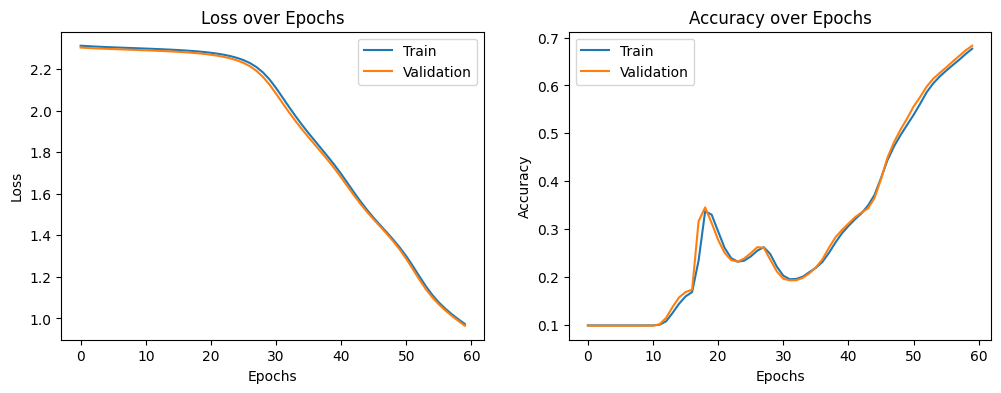

In [ ]:
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


### Comparison between PyTorch and Custom Implementation
Custom implementation is much faster than PyTorch implementation. Custom implementation takes almost the half time of PyTorch implementation. The reason is that PyTorch is a high level library and it has many built-in functions which makes it slower than custom implementation. However, PyTorch is much easier to use and it has many built-in functions which makes it easier to implement complex models. Custom implementation is faster but it is harder to implement complex models.

Accuracy and loss values are very close to each other. There is no significant difference between them. Both implementations have similar accuracy and loss values. This shows that custom implementation is correct and it is working as expected.


# BONUS ASSIGNMENT 1

Epoch 1/60 -> Train Loss: 2.3026, Train Accuracy: 0.0944 Validation Loss: 2.2950, Validation Accuracy: 0.0919
Epoch 2/60 -> Train Loss: 2.3022, Train Accuracy: 0.0984 Validation Loss: 2.2945, Validation Accuracy: 0.0959
Epoch 3/60 -> Train Loss: 2.3018, Train Accuracy: 0.1127 Validation Loss: 2.2942, Validation Accuracy: 0.1674
Epoch 4/60 -> Train Loss: 2.3014, Train Accuracy: 0.1272 Validation Loss: 2.2938, Validation Accuracy: 0.1135
Epoch 5/60 -> Train Loss: 2.3011, Train Accuracy: 0.1124 Validation Loss: 2.2935, Validation Accuracy: 0.1135
Epoch 6/60 -> Train Loss: 2.3008, Train Accuracy: 0.1124 Validation Loss: 2.2932, Validation Accuracy: 0.1135
Epoch 7/60 -> Train Loss: 2.3005, Train Accuracy: 0.1124 Validation Loss: 2.2929, Validation Accuracy: 0.1135
Epoch 8/60 -> Train Loss: 2.3003, Train Accuracy: 0.1124 Validation Loss: 2.2927, Validation Accuracy: 0.1135
Epoch 9/60 -> Train Loss: 2.3000, Train Accuracy: 0.1124 Validation Loss: 2.2924, Validation Accuracy: 0.1135
Epoch 10/6

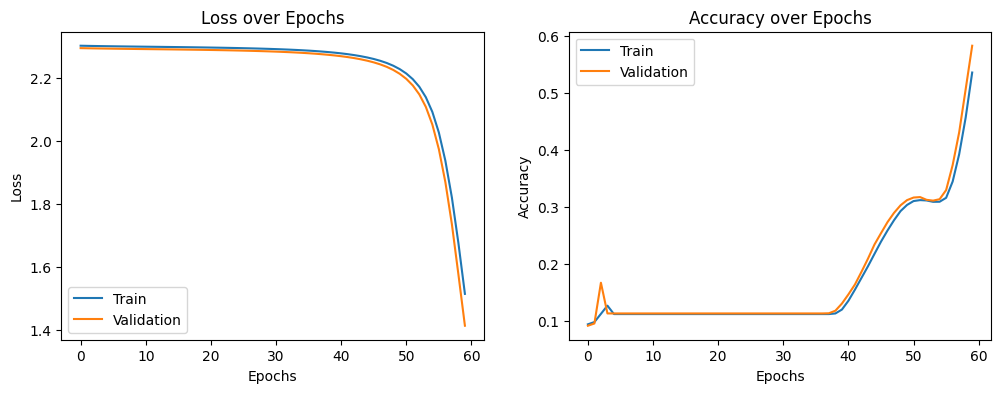

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import gzip
import numpy as np
import time

# Define the neural network architecture
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(FeedForwardNN, self).__init__()
        self.layers = nn.ModuleList()
        in_size = input_size
        # print(in_size)
        for hidden_size in hidden_sizes:
            self.layers.append(nn.Linear(in_size, hidden_size))
            self.layers.append(nn.ReLU())
            in_size = hidden_size
        self.layers.append(nn.Linear(in_size, output_size))
        # print(self.layers)
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Function to train the model
def train_model(model, train_loader, criterion, optimizer):
    model.train()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for inputs, labels in load_mnist_batch(train_images_path, train_labels_path, batch_size):
        # inputs = torch.from_numpy(inputs)
        # labels = torch.from_numpy(labels)
        inputs, labels = inputs.to(dtype=torch.float32), labels

        optimizer.zero_grad()
        # print(inputs.size())
        outputs = model(inputs.view(inputs.size(0), -1))
        # print(outputs.size(),labels.size())
        loss = criterion(outputs, labels)
        # print(loss.item())
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct_predictions += predicted.eq(labels).sum().item()
        total_samples += labels.size(0)

    average_loss = total_loss / len(train_loader)
    accuracy = correct_predictions / total_samples

    return average_loss, accuracy

# Function to evaluate the model on validation or test set
def evaluate_model(model, data_loader, criterion):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in load_mnist_batch(test_images_path, test_labels_path, batch_size):
            # inputs = torch.from_numpy(inputs)
            # labels = torch.from_numpy(labels)
            inputs, labels = inputs.to(dtype=torch.float32), labels

            outputs = model(inputs.view(inputs.size(0), -1))
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct_predictions += predicted.eq(labels).sum().item()
            total_samples += labels.size(0)

    average_loss = total_loss / len(data_loader)
    accuracy = correct_predictions / total_samples

    return average_loss, accuracy

# Function to plot training progress
def plot_progress(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 4))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train')
    plt.plot(val_losses, label='Validation')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train')
    plt.plot(val_accuracies, label='Validation')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Load MNIST data with the custom DataLoader functions
batch_size = 32
train_transform = transforms.Compose([transforms.ToTensor()])
train_dataset = MNIST('./data', train=True, transform=train_transform, download=True)

# Convert the MNIST data to NumPy arrays using custom functions
train_images = load_mnist_images('data/MNIST/raw/train-images-idx3-ubyte.gz', len(train_dataset))
train_labels = load_mnist_labels('data/MNIST/raw/train-labels-idx1-ubyte.gz', len(train_dataset))
test_images = load_mnist_images('data/MNIST/raw/t10k-images-idx3-ubyte.gz', 10000)
test_labels = load_mnist_labels('data/MNIST/raw/t10k-labels-idx1-ubyte.gz', 10000)
# Create a DataLoader from NumPy arrays
train_data = TensorDataset(torch.from_numpy(train_images), torch.from_numpy(train_labels))
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_data = TensorDataset(torch.from_numpy(test_images), torch.from_numpy(test_labels))
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
input_size = 28 * 28  # MNIST image size
hidden_sizes =[500 for i in range(5)]  # Four hidden layers with 32 neurons each
output_size = 10  # Number of classes (digits 0-9)
model = FeedForwardNN(input_size, hidden_sizes, output_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0003)

# Training loop
num_epochs = 60
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Train the model
    train_loss, train_accuracy = train_model(model, train_loader, criterion, optimizer)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_loss, val_accuracy = evaluate_model(model, test_loader, criterion)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch + 1}/{num_epochs} -> Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}',
          f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Plot training progress
plot_progress(train_losses, val_losses, train_accuracies, val_accuracies)


Epoch [1/60], Training Loss: 0.9366, Training Accuracy: 80.89%
Time to train epoch: 9.3690 seconds
Validation Loss: 0.7921, Validation Accuracy: 85.61%
Epoch [2/60], Training Loss: 0.7475, Training Accuracy: 86.94%
Time to train epoch: 8.8940 seconds
Validation Loss: 0.6994, Validation Accuracy: 87.76%
Epoch [3/60], Training Loss: 0.6624, Training Accuracy: 88.99%
Time to train epoch: 8.3547 seconds
Validation Loss: 0.6327, Validation Accuracy: 89.26%
Epoch [4/60], Training Loss: 0.5971, Training Accuracy: 90.47%
Time to train epoch: 8.8722 seconds
Validation Loss: 0.5811, Validation Accuracy: 90.39%
Epoch [5/60], Training Loss: 0.5452, Training Accuracy: 91.52%
Time to train epoch: 8.9569 seconds
Validation Loss: 0.5401, Validation Accuracy: 91.10%
Epoch [6/60], Training Loss: 0.5040, Training Accuracy: 92.36%
Time to train epoch: 8.8893 seconds
Validation Loss: 0.5094, Validation Accuracy: 91.78%
Epoch [7/60], Training Loss: 0.4715, Training Accuracy: 93.03%
Time to train epoch: 8.84

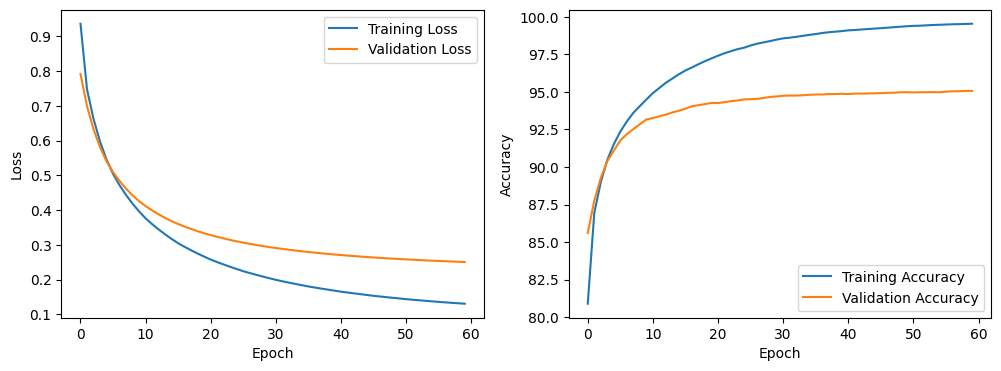

In [6]:
from torch.optim.lr_scheduler import StepLR
timesCustom = []
def load_mnist_batch(images_filename, labels_filename, batch_size):
    with gzip.open(images_filename, 'rb') as f_images, gzip.open(labels_filename, 'rb') as f_labels:
        # Read image metadata
        magic_number_images = int.from_bytes(f_images.read(4), 'big')
        num_images = int.from_bytes(f_images.read(4), 'big')
        rows = int.from_bytes(f_images.read(4), 'big')
        cols = int.from_bytes(f_images.read(4), 'big')

        # Read label metadata
        magic_number_labels = int.from_bytes(f_labels.read(4), 'big')
        num_labels = int.from_bytes(f_labels.read(4), 'big')

        # Check if the number of images and labels match
        assert num_images == num_labels, "Number of images and labels do not match."

        # Determine the number of batches
        num_batches = num_images // batch_size
        start_time = time.time()
        for batch in range(num_batches):
            # Read image batch
            image_data = np.frombuffer(f_images.read(batch_size * rows * cols), dtype=np.uint8).reshape(batch_size, rows, cols)
            # Normalize
            image_data = image_data / 255.0
            label_data = np.frombuffer(f_labels.read(batch_size), dtype=np.uint8)

            # Convert to PyTorch tensors
            image_data = torch.tensor(image_data, dtype=torch.float32)
            label_data = torch.tensor(label_data, dtype=torch.int64)

            yield image_data, label_data
# FF NN with 5 layers
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.layers = nn.ModuleList()
        self.bns = nn.ModuleList()
        self.sigmoids = nn.ModuleList()

        for i in range(10):
            if i == 0:
                self.layers.append(nn.Linear(input_size, hidden_size))
            else:
                self.layers.append(nn.Linear(hidden_size, hidden_size))

            self.bns.append(nn.BatchNorm1d(hidden_size))
            self.sigmoids.append(nn.Sigmoid())

        # Output layer
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.output_bn = nn.BatchNorm1d(output_size)

    def forward(self, x):
        for i in range(len(self.layers)):
            x = self.layers[i](x)
            x = self.bns[i](x)
            x = self.sigmoids[i](x)

        # Output layer
        x = self.output_layer(x)
        x = self.output_bn(x)

        return x


    # def forward(self, x):
    #     x = self.l1(x)
    #     x = self.bn1(x)
    #     x = self.sigmoid1(x)

    #     x = self.l2(x)
    #     x = self.bn2(x)
    #     x = self.sigmoid2(x)

    #     x = self.l3(x)
    #     x = self.bn3(x)
    #     x = self.sigmoid3(x)

    #     x = self.l4(x)
    #     x = self.bn4(x)
    #     x = self.sigmoid4(x)

    #     x = self.l5(x)
    #     return x

network = SimpleNN(28*28, 400, 10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(network.parameters(), lr=0.0003)
schedular = StepLR(optimizer,step_size = 5, gamma = 0.9)
# Load the data using custom dataloader
epochs = 60
lossTrainTorch = []
accuracyTrainTorch = []
lossTestTorch = []
accuracyTestTorch = []
batch_size = 32


for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    start_time = time.time()
    for images, labels in load_mnist_batch(train_images_path, train_labels_path, batch_size):
        # Forward, backward, and update parameters
        images = images.view(-1, 28*28)
        images, labels = images.to(device), labels.to(device)
        outputs = network(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    running_loss *= batch_size
    lossTrainTorch.append(running_loss / total)
    accuracyTrainTorch.append(correct / total)
    end_time = time.time()

    print(f'Epoch [{epoch + 1}/{epochs}], '
          f'Training Loss: {running_loss / total:.4f}, Training Accuracy: {100 * correct / total:.2f}%')
    print(f"Time to train epoch: {end_time - start_time:.4f} seconds")
    schedular.step()
    # Test the model
    with torch.no_grad():
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in load_mnist_batch(test_images_path, test_labels_path, batch_size):
            images, labels = images.to(device), labels.to(device)
            images = images.view(-1, 28*28)
            outputs = network(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        running_loss *= batch_size
        lossTestTorch.append(running_loss / total)
        accuracyTestTorch.append(correct / total)
        print(f'Validation Loss: {running_loss / total:.4f}, Validation Accuracy: {100 * correct / total:.2f}%')
#plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(lossTrainTorch, label='Training Loss')
plt.plot(lossTestTorch, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([100 * i for i in accuracyTrainTorch], label='Training Accuracy')
plt.plot([100 * i for i in accuracyTestTorch], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


